In [2]:
import os, shutil, sys
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
from utils import acc_plot, loss_plot
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
def create_dir(directory):
    if os.path.exists(directory):
        return
    os.mkdir(directory)

In [5]:
def copy_file(src_path, dst_path, file):
    src = os.path.join(src_path, file)
    dst = os.path.join(dst_path, file)
    shutil.copy(src, dst)

In [6]:
dataset_dir = 'train'

base_dir = 'cats_and_dogs'
create_dir(base_dir)

train_dir = os.path.join(base_dir, 'train')
create_dir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
create_dir(val_dir)

test_dir = os.path.join(base_dir, 'test')
create_dir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
create_dir(train_cats_dir)

val_cats_dir = os.path.join(val_dir, 'cats')
create_dir(val_cats_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
create_dir(test_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
create_dir(train_dogs_dir)

val_dogs_dir = os.path.join(val_dir, 'dogs')
create_dir(val_dogs_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
create_dir(test_dogs_dir)

In [5]:
for f in [f'cat.{i}.jpg' for i in range(1000)]:
    copy_file(dataset_dir, train_cats_dir, f)
    
for f in [f'cat.{i}.jpg' for i in range(1000, 1500)]:
    copy_file(dataset_dir, val_cats_dir, f)
    
for f in [f'cat.{i}.jpg' for i in range(1500, 2000)]:
    copy_file(dataset_dir, test_cats_dir, f)

for f in [f'dog.{i}.jpg' for i in range(1000)]:
    copy_file(dataset_dir, train_dogs_dir, f)
    
for f in [f'dog.{i}.jpg' for i in range(1000, 1500)]:
    copy_file(dataset_dir, val_dogs_dir, f)
    
for f in  [f'dog.{i}.jpg' for i in range(1500, 2000)]:
    copy_file(dataset_dir, test_dogs_dir, f)

In [11]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Adding more Conv2D and MaxPooling layers reduces the number of model parameters, as each successive 
# convolution and pooling layer reduces the dimensionality of the input data, resulting in fewer parameters
# to learn.

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

### Generators

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary') # binary labalels bc binary crossentropy used as a loss function
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=20, class_mode='binary')

for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


In [12]:
# steps_per_epoch * batch_size = train_data_size
model.fit(train_generator,
          steps_per_epoch=100,
          epochs=30,
          validation_data=val_generator,
          validation_steps=50)

Epoch 1/30


2023-03-06 22:33:13.705872: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x563c729b00d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-06 22:33:13.705894: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2023-03-06 22:33:13.745177: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-06 22:33:14.021410: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 [==============================] - 6s 47ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6870 - val_accuracy: 0.5230
Epoch 2/30
100/100 [==============================] - 5s 46ms/step - loss: 0.6940 - accuracy: 0.5260 - val_loss: 0.6802 - val_accuracy: 0.5940
Epoch 3/30
100/100 [==============================] - 5s 46ms/step - loss: 0.6721 - accuracy: 0.6020 - val_loss: 0.6707 - val_accuracy: 0.5880
Epoch 4/30
100/100 [==============================] - 5s 45ms/step - loss: 0.6122 - accuracy: 0.6560 - val_loss: 0.6085 - val_accuracy: 0.6780
Epoch 5/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5854 - accuracy: 0.6885 - val_loss: 0.5841 - val_accuracy: 0.6980
Epoch 6/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5298 - accuracy: 0.7260 - val_loss: 0.5928 - val_accuracy: 0.6800
Epoch 7/30
100/100 [==============================] - 5s 45ms/step - loss: 0.4855 - accuracy: 0.7645 - val_loss: 0.6160 - val_accuracy: 0.6900
Epoch 8/30

In [13]:
model.save('small_cnn.h5')

In [14]:
# I forgot to create history from this training and create plots but it's easy to perceive that after 8th epoch validation loss started increasing.

## Data augmentation
#### Another method to prevent overfitting

In [7]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

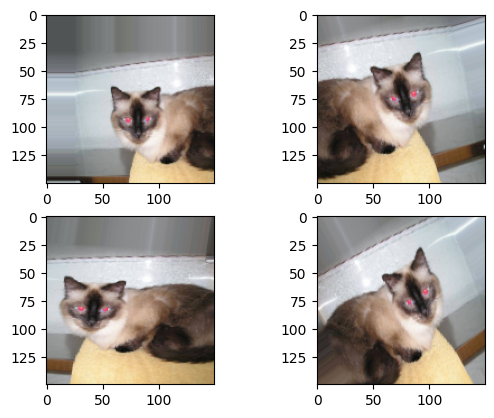

In [39]:
cats = [os.path.join(train_cats_dir, cat) for cat in os.listdir(train_cats_dir)]
img_path = cats[3]
img = load_img(img_path, target_size=(150,150))
x = np.array(img)
x = x.reshape((1,)+x.shape) / 255.
i = j = c = 0
fig, axs = plt.subplots(2,2)
for batch in datagen.flow(x, batch_size=1):
    axs[i,j].imshow(batch[0])
    if j==1:
        i=1
        j=0
    else:
        j+=1
    c+=1
    if c == 4: break
plt.show()

In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5), # New
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # Validation data should not be modified

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary') # binary labalels bc binary crossentropy used as a loss function
val_generator = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=100, validation_data=val_generator, validation_steps=50)

Epoch 1/100


2023-03-09 14:31:01.606087: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-09 14:31:02.743384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-09 14:31:02.745427: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x565268409760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-09 14:31:02.745442: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2023-03-09 14:31:02.748485: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-09 14:31:02.816677: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for th

100/100 [==============================] - 13s 93ms/step - loss: 0.6967 - accuracy: 0.5045 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 9s 90ms/step - loss: 0.6934 - accuracy: 0.5270 - val_loss: 0.6906 - val_accuracy: 0.5070
Epoch 3/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6919 - accuracy: 0.5235 - val_loss: 0.6803 - val_accuracy: 0.6200
Epoch 4/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6837 - accuracy: 0.5340 - val_loss: 0.6699 - val_accuracy: 0.5670
Epoch 5/100
100/100 [==============================] - 9s 94ms/step - loss: 0.6687 - accuracy: 0.5750 - val_loss: 0.6788 - val_accuracy: 0.5400
Epoch 6/100
100/100 [==============================] - 9s 91ms/step - loss: 0.6910 - accuracy: 0.5300 - val_loss: 0.6813 - val_accuracy: 0.5640
Epoch 7/100
100/100 [==============================] - 9s 93ms/step - loss: 0.6859 - accuracy: 0.5390 - val_loss: 0.6887 - val_accuracy: 0.5160
Epo

In [12]:
model.save('small_cnn2.h5')

In [48]:
history_dict = history.history

In [50]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

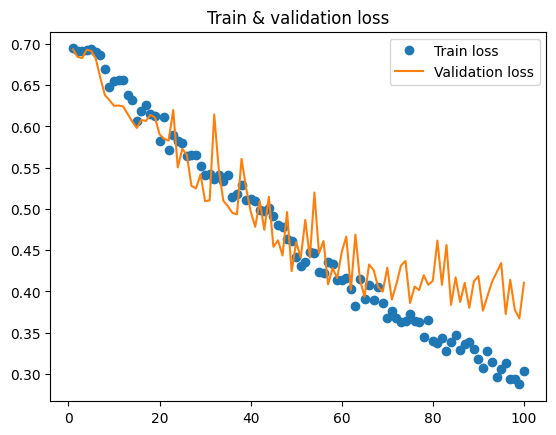

In [53]:
epochs = 100
loss_plot(history_dict, epochs)

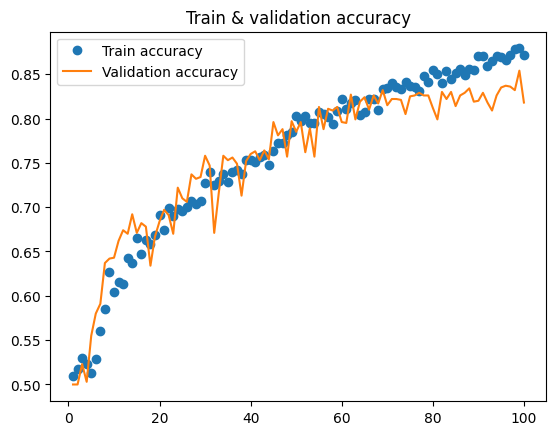

In [54]:
acc_plot(history_dict, epochs)